<a href="https://colab.research.google.com/github/yiichinn/colab/blob/main/0530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download ('popular')
nltk.download ('all-copora')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

False

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/content/drive/MyDrive/Colab Notebooks/TED'
wordlists = PlaintextCorpusReader(corpus_root, '.*')

books = wordlists.fileids()
print(books)

['2011pos Older people are happier.txt', '2012neg What doctors don_t know about the drugs they prescribe.txt', '2016neu Asking for help is a strength, not a weakness.txt']


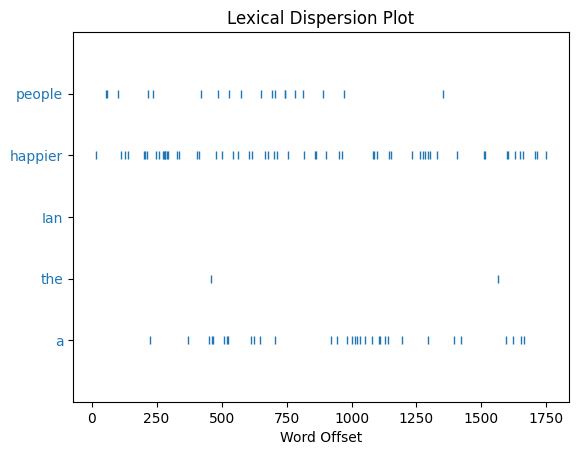

In [ ]:
import nltk
testText = wordlists.words('2011pos Older people are happier.txt')
single = nltk.text.Text(testText)

findList = ["a","the", 'Ian', "happier", "people"]
single.dispersion_plot(findList)

In [ ]:
books = wordlists.fileids()

cfd = nltk.ConditionalFreqDist((fileid, word)
    for fileid in books
    for word in wordlists.words(fileid))

findList = ['can', 'could', 'may', 'might', 'must', 'will', 'shall', 'should']
cfd.tabulate(conditions=books, samples=findList)


                                                                      can  could    may  might   must   will  shall should 
                              2011pos Older people are happier.txt      9      3      3      2      0      4      0      1 
2012neg What doctors don_t know about the drugs they prescribe.txt      6      3      0      2      1      7      0      0 
         2016neu Asking for help is a strength, not a weakness.txt     23      4      0      0      4      4      0      0 


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

dataset = wordlists. raw('2011pos Older people are happier.txt') # your txt file
text_list = dataset.split()
stop = stopwords.words('english')
wnl = WordNetLemmatizer()

clean_tokens = text_list [:]
for token in text_list:
  if token.lower() in stopwords.words('english') :
    clean_tokens.remove(token)

no_string_tokens = clean_tokens
for token in clean_tokens:
  if token in string.punctuation or token in '--' or token in '?':
    no_string_tokens.remove(token)

lower_tokens = []
for token in no_string_tokens:
  new_token = token.replace(' ', '')
  lower_tokens . append (new_token.lower())

lemmatizer_tokens = []
for token in lower_tokens:
  lemmatizer_tokens.append(wnl.lemmatize(token))

fdist = FreqDist(lemmatizer_tokens)
FreqDist(lemmatizer_tokens)

fdist1 = fdist.most_common(10)
print(fdist1)

[('people', 29), ('older', 19), ('life', 12), ('time', 12), ("we've", 9), ('younger', 9), ('positive', 9), ('one', 6), ('year', 5), ("we're", 5)]


People: 2
living: 1
longer: 3
societies: 3
getting: 1
grayer.: 1
hear: 3
time.: 1
read: 1
newspapers.: 1
television: 1
sets.: 1
Sometimes: 1
concerned: 1
much: 2
come: 2
accept: 1
lives: 2
kind: 2
complacency,: 1
even: 2
ease.: 1
make: 2
mistake,: 1
and,: 1
believe,: 1
will: 3
improve: 3
quality: 2
life: 10
ages.: 3
Now: 5
put: 2
perspective,: 1
let: 1
zoom: 1
minute.: 1
years: 4
added: 3
average: 1
expectancy: 3
20th: 1
century: 1
across: 2
prior: 1
millennia: 1
human: 2
evolution: 1
combined.: 1
blink: 1
eye,: 1
nearly: 1
doubled: 1
length: 1
time: 12
living.: 1
feel: 1
aging: 3
thing: 1
quite: 1
pegged,: 1
kick: 1
yourself.: 1
brand: 1
new.: 1
fertility: 1
rates: 1
fell: 1
period: 1
going: 1
up,: 1
pyramid: 1
always: 3
represented: 1
distribution: 1
age: 3
population,: 1
many: 1
young: 1
ones: 4
bottom: 1
winnowed: 1
tiny: 1
peak: 1
older: 17
people: 27
survive: 1
old: 2
reshaped: 1
rectangle.: 1
now,: 1
person: 1
chills: 1
population: 1
statistics,: 1
it.: 2
means: 1
first: 1
histo

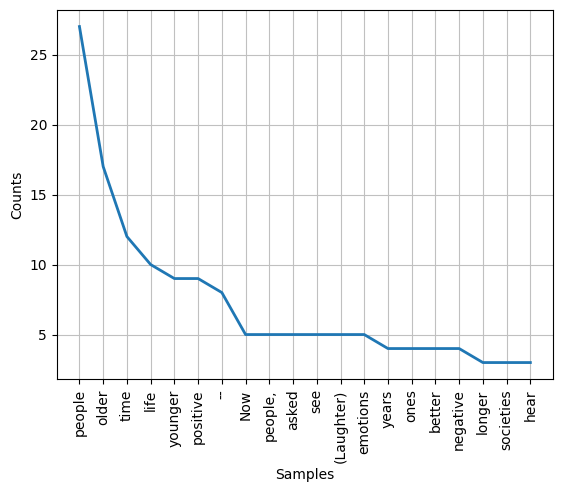

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
import nltk
from wordcloud import STOPWORDS
dataset = wordlists.raw('2011pos Older people are happier.txt')
tokens = dataset.split()
clean_tokens = tokens[:]
for token in tokens:
    if token.lower() in STOPWORDS:
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key, val in freq.items():
    print(str(key) + ": " +
          str(val))
freq.plot(20, cumulative=False)

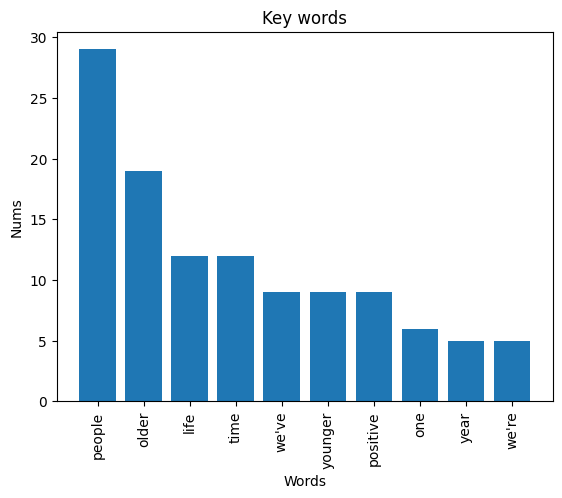

In [ ]:
import matplotlib.pyplot as plt
x = [data[0] for data in fdist1]
y = [data[1] for data in fdist1]

plt.bar(x, y)
plt.title('Key words')
plt.xlabel( 'Words')
plt.ylabel('Nums')
plt.xticks(fontsize=10, rotation=90)
plt.show()

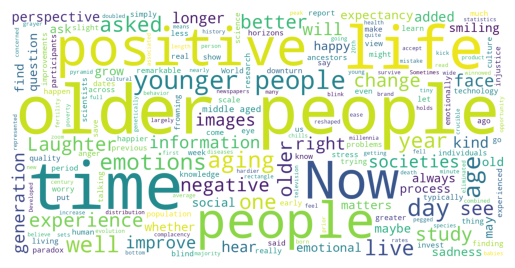

In [ ]:
file_text = open('/content/drive/MyDrive/Colab Notebooks/TED/2011pos Older people are happier.txt', 'r')
text = file_text.read()
file_text.close()

wordcloud = WordCloud(
    background_color="white",
    width=2000,
    height=1000,
    margin=10,
).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()